In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
# 定义VGG网络中的卷积块：卷积层的个数，卷积层中卷积核的个数
def vgg_block(num_convs, num_filters):
    # 构建序列模型
    blk = tf.keras.models.Sequential()
    # 遍历所有的卷积层
    for _ in range(num_convs):
        # 每个卷积层：num_filter个卷积核，卷积核大小为3*3，padding是same，激活函数是relu
        blk.add(tf.keras.layers.Conv2D(num_filters, kernel_size=3, padding='same', activation='relu'))
    # 卷积块最后是一个最大池化，窗口大小为2*2，步长为2
    blk.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    return blk

In [3]:
# 定义5个卷积块，指明每个卷积块中的卷积层个数及相应的卷积核个数
conv_arch = ((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))

In [4]:
# 定义VGG网络
def vgg(conv_arch):
    # 构建序列模型
    net = tf.keras.models.Sequential()
    # 根据conv_arch生成卷积部分
    for (num_convs, num_filters) in conv_arch:
        net.add(vgg_block(num_convs, num_filters))
    # 卷积块序列后添加全连接层
    net.add(tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),  # 将特征图展成一维向量
        tf.keras.layers.Dense(4096, activation='relu'),   # 全连接层：4096个神经元，激活函数是relu
        tf.keras.layers.Dropout(0.5),  # 随机失活
        tf.keras.layers.Dense(4096, activation='relu'),   # 全连接层：4096个神经元，激活函数是relu
        tf.keras.layers.Dropout(0.5), # 随机失活
        tf.keras.layers.Dense(10, activation='softmax')  
    ]))
    return net

In [5]:
# 网络实例化
net = vgg(conv_arch)

In [6]:
# 构造输入X，并将其送入到net网络中
X = tf.random.uniform((1,224,224,1))
y = net(X)
# 通过net.summay()查看网络的形状
net.summay()

AttributeError: 'Sequential' object has no attribute 'summay'

In [7]:
# 获取手写数字数据集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
# 训练集数据维度的调整：N H W C
train_images = np.reshape(train_images, (train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
# 测试集数据维度的调整：N H W C
test_images = np.reshape(test_images, (test_images.shape[0], test_images.shape[1], test_images.shape[2] ,1))

In [16]:
# 定义两个方法随机抽取部分样本演示
# 获取训练集数据
def get_train(size):
    index = np.random.randint(0, np.shape(train_images)[0], size)
    resized_images = tf.image.resize_with_pad(train_images[index], 224, 224)
    return resized_images.numpy(), train_labels[index]

# 获取测试集数据 
def get_test(size):
    index = np.random.randint(0, np.shape(test_images)[0], size)
    resized_images = tf.image.resize_with_pad(test_images[index], 224, 224)
    return resized_images.numpy(), test_labels[index]

In [17]:
# 获取训练样本和测试样本
train_images, train_labels = get_train(256)
test_images, test_labels = get_test(128)

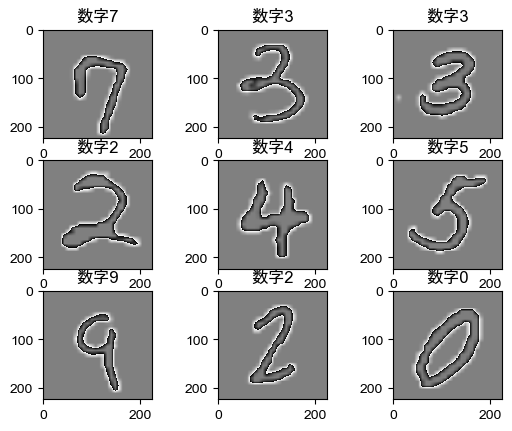

In [19]:
# 数据展示：将数据集的前九个数据集进行展示
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i].astype(np.int8).squeeze(), cmap='gray', interpolation='none')
    plt.title("数字{}".format(train_labels[i]))

# 绘图过程内中文乱码解决
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.unicode_minus'] = False

In [20]:
# 指定优化器，损失函数和评价指标
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)

net.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
# 模型训练： 指定训练数据，batchsize,epoch,验证集
net.fit(train_images, train_labels, batch_size=128, epochs=3, verbose=1, validation_split=0.1)

Epoch 1/3


2024-07-30 16:50:46.917573: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 76s 35s/step - loss: 2.3310 - accuracy: 0.1174 - val_loss: 2.2258 - val_accuracy: 0.2692
Epoch 2/3
2/2 [==============================] - 76s 35s/step - loss: 2.2117 - accuracy: 0.1957 - val_loss: 2.1049 - val_accuracy: 0.2692
Epoch 3/3
2/2 [==============================] - 72s 33s/step - loss: 2.1935 - accuracy: 0.2130 - val_loss: 2.1290 - val_accuracy: 0.4615


In [24]:
# 指定测试数据
net.evaluate(test_images, test_labels, verbose=1)

4/4 [==============================] - 11s 3s/step - loss: 2.0899 - accuracy: 0.3594


[2.0899486541748047, 0.359375]